In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from knn import KNN

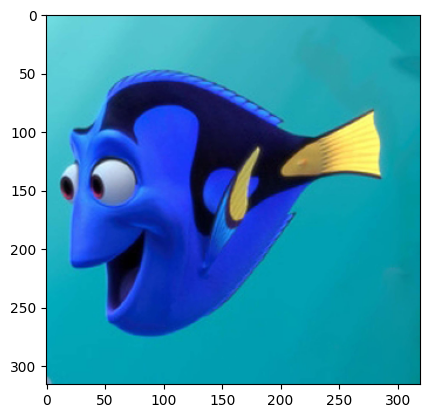

In [3]:
dori = cv2.imread('input\dori.jpg')
dori = cv2.cvtColor(dori, cv2.COLOR_BGR2RGB)
dori = cv2.resize(dori, (0,0), fx=0.2, fy=0.2)
plt.imshow(dori)
plt.show()

In [4]:
# create dataset from pixels
pixels_list = dori.reshape(-1, 3)
pixels_list.shape

(101120, 3)

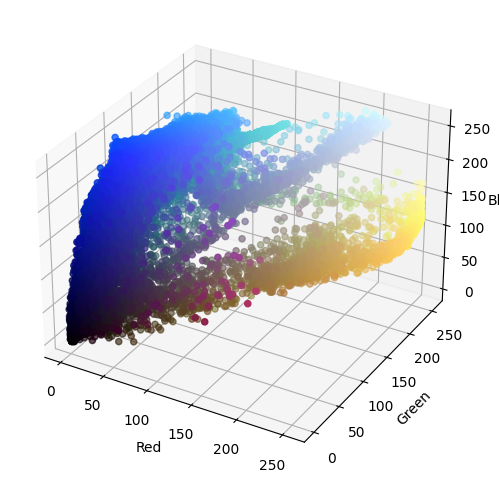

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(pixels_list[:, 0], pixels_list[:, 1], pixels_list[:, 2], c=pixels_list/255, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [6]:
dori_hsv = cv2.cvtColor(dori, cv2.COLOR_RGB2HSV)
dori.shape

(316, 320, 3)

In [7]:
pixels_list_hsv= dori_hsv.reshape(-1, 3)
pixels_list_hsv 

array([[ 91, 124, 228],
       [ 91, 124, 228],
       [ 91, 125, 226],
       ...,
       [ 92, 253, 146],
       [ 93, 248, 150],
       [ 93, 252, 152]], dtype=uint8)

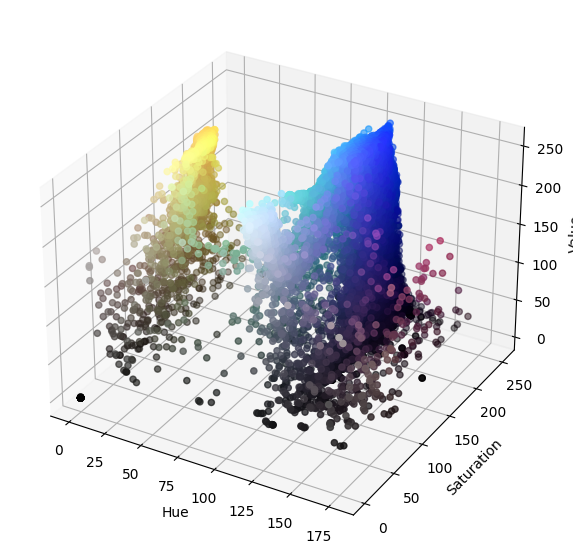

In [8]:
fig= plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

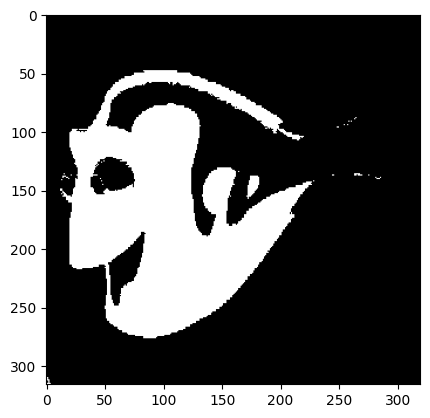

In [9]:
# create mask for blue parts
dark_blue= (100, 70, 90)
light_blue = (190, 255, 255)
blue_mask= cv2.inRange(dori_hsv, dark_blue, light_blue)
plt.imshow(blue_mask, cmap='gray')

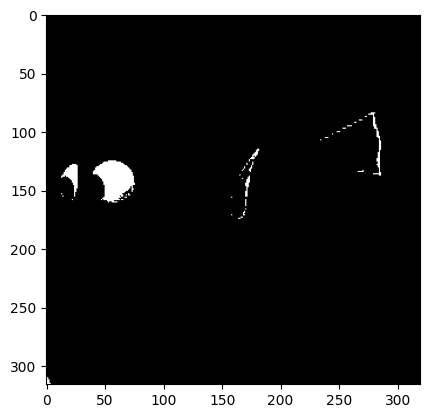

In [10]:
# create mask for white parts
dark_white = (0, 0, 168)
light_white= (172, 111, 255)

white_mask= cv2.inRange(dori_hsv, dark_white, light_white )
plt.imshow(white_mask, cmap='gray')

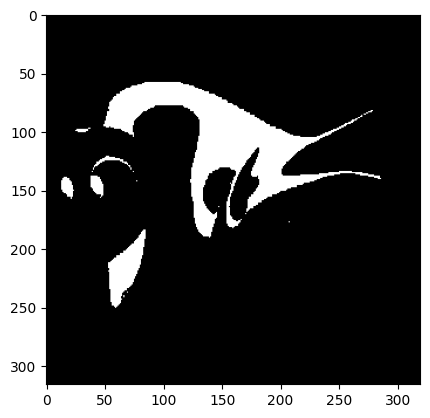

In [11]:
# create mask for black parts
dark_black= (0, 0, 0)
light_black= (300, 290, 110)
 
black_mask = cv2.inRange(dori_hsv, dark_black, light_black)
plt.imshow(black_mask, cmap='gray')

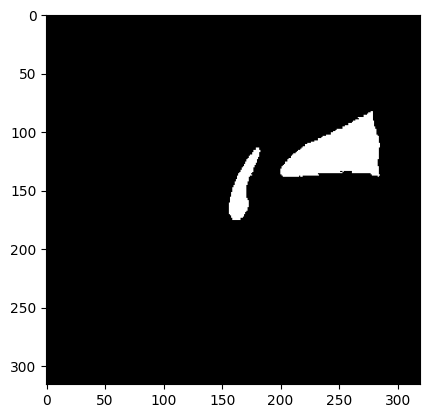

In [12]:
# create mask for yellow parts
dark_yellow= (10, 30, 50)
light_yellow= (35, 255, 255)

yellow_mask= cv2.inRange(dori_hsv, dark_yellow, light_yellow)
plt.imshow(yellow_mask, cmap='gray')

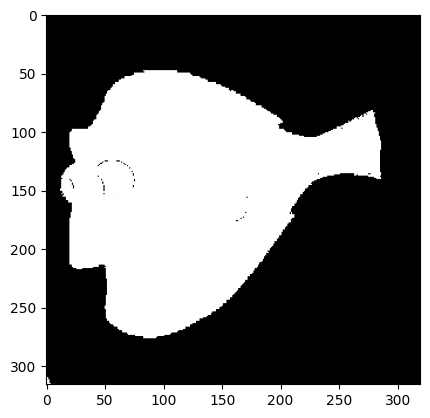

In [13]:
final_mask= blue_mask + white_mask + black_mask + yellow_mask
plt.imshow(final_mask, cmap='gray')

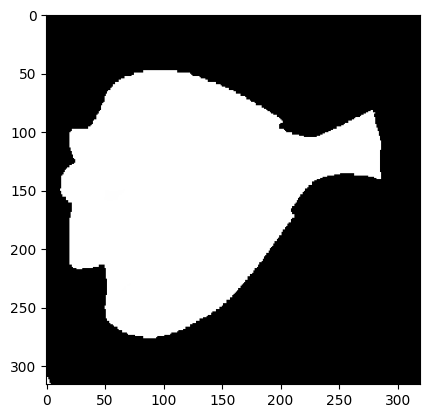

In [14]:
kernel= np.ones((3, 3), np.uint8)
image = cv2.dilate(final_mask, kernel, cv2.BORDER_TRANSPARENT)
image = cv2.erode(image, kernel, cv2.BORDER_TRANSPARENT)
plt.imshow(image, cmap='gray')

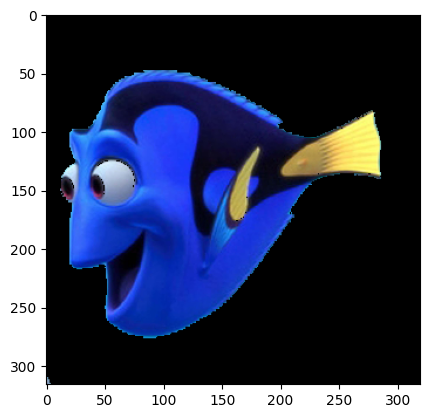

In [15]:
final_result = cv2.bitwise_and(dori, dori, mask=final_mask)
plt.imshow(final_result, cmap='gray')

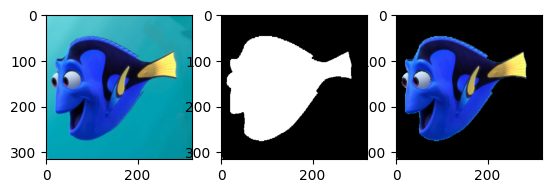

In [16]:
plt.subplot(1, 3, 1)
plt.imshow(dori, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(image, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.show()

In [17]:
# Training: pixels_list_hsv" was used as train dataset
# data were divided by 255 to normalized

X_train = pixels_list_hsv / 255
X_train.shape


(101120, 3)

In [18]:
# considering final mask as labels
# dori pixels ere considered as 1 label and image background as 0 label 

final_mask.shape

(316, 320)

In [19]:
Y_train = final_mask.reshape(-1,)// 255
Y_train.shape

(101120,)

In [20]:
knn = KNN(3)
knn.fit(X_train, Y_train)

(86, 146, 3)

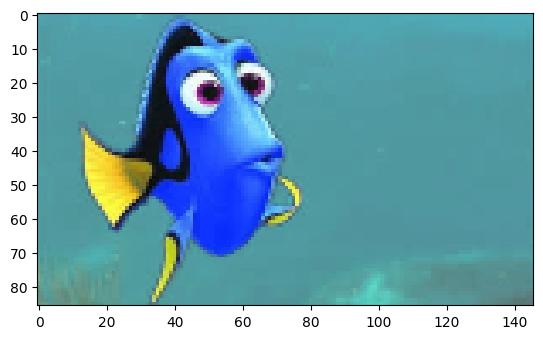

In [21]:
# Prediction for new images
dashe_dori= cv2.imread('input\dashe_dori.jpg')
dashe_dori= cv2.resize(dashe_dori, (0, 0), fx=0.5, fy=0.5)
dashe_dori= cv2.cvtColor(dashe_dori, cv2.COLOR_BGR2RGB)
dashe_dori_hsv= cv2.cvtColor(dashe_dori, cv2.COLOR_RGB2HSV)
plt.imshow(dashe_dori, cmap='gray')
dashe_dori_hsv.shape

In [22]:
X_test= dashe_dori_hsv.reshape(-1, 3)/255
X_test= np.array(X_test)
print(X_test.shape)

(12556, 3)


In [23]:
Y_pred= knn.predict(X_test)

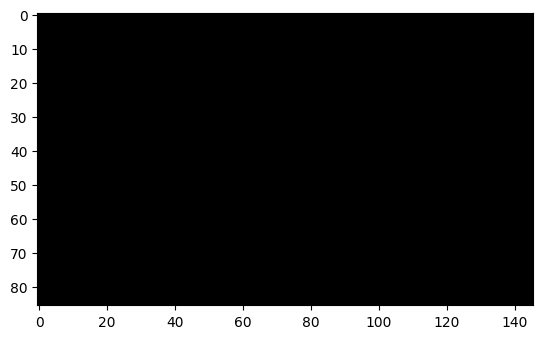

In [24]:
Y_pred= np.array(Y_pred)
output1= Y_pred.reshape(dashe_dori_hsv.shape[:2])
plt.imshow(output1, cmap='gray')

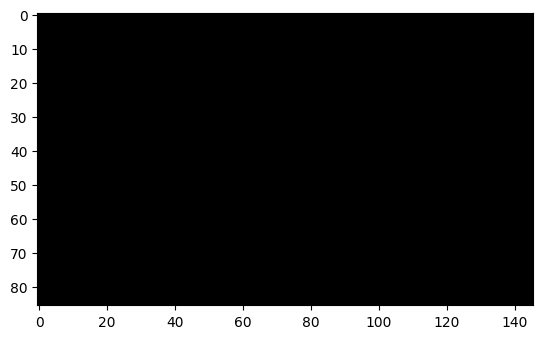

In [25]:
output1= output1.astype('uint8')
final_result1= cv2.bitwise_and(dashe_dori, dashe_dori, mask=output1)
plt.imshow(final_result1, cmap='gray')

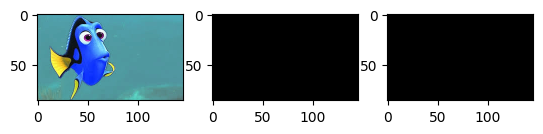

In [26]:
plt.subplot(1, 3, 1)
plt.imshow(dashe_dori, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(output1, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(final_result1)
plt.show()

In [ ]:
# prediction for dori's sister
